# 🏥 뉴욕주립병원 입원환자 퇴원 금액

In [39]:
import pandas as pd



h_df = pd.read_csv('../../../datasets/p_hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv', low_memory=False)
h_df


,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,27775.54,9819.99
2622131,2622131,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,NaN,NaN,NaN,NaN,NaN,0,Y,Y,11738.58,3295.21


In [40]:
# 결측치 확인
h_df.isna().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [41]:
# 중복값 확인
h_df.duplicated().sum()

0

In [42]:
# 불필요 컬럼 삭제
columns = ['index','Health Service Area','Hospital County','Operating Certificate Number', 'Facility ID','Age Group', 'Gender', 'Race', 
'Ethnicity','Length of Stay', 'Type of Admission', 'Patient Disposition','Discharge Year', 'CCS Diagnosis Code','CCS Procedure Code',
'APR DRG Code', 'APR MDC Code','APR Severity of Illness Code','APR Risk of Mortality','APR Medical Surgical Description','Attending Provider License Number',
'Operating Provider License Number','Other Provider License Number','Birth Weight','Abortion Edit Indicator',
'Emergency Department Indicator', 'Discharge Year', 'Total Charges']

pre_h_df = h_df[columns].copy()
pre_h_df

pre_h_df = pre_h_df.drop(labels = ['index','Discharge Year', 'Abortion Edit Indicator'], axis =1)

In [43]:
# 결측치 삭제
pre_h_df = pre_h_df.dropna().reset_index(drop=True)

In [44]:
# 중복값 확인
pre_h_df.duplicated().sum()

5660

In [45]:
# 중복값 삭제
pre_h_df = pre_h_df.drop_duplicates().reset_index(drop=True)

In [46]:
pre_h_df

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,...,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Emergency Department Indicator,Total Charges
0,Capital/Adiron,Albany,101000.0,1.0,70 or Older,F,White,Not Span/Hispanic,5,Elective,...,23,2,Minor,Medical,140796.0,140796.0,170254.0,0,N,13593.51
1,Capital/Adiron,Albany,101000.0,1.0,70 or Older,F,White,Not Span/Hispanic,4,Elective,...,8,1,Minor,Surgical,170254.0,170254.0,170254.0,0,N,31962.58
2,Capital/Adiron,Albany,101000.0,1.0,50 to 69,F,White,Not Span/Hispanic,3,Emergency,...,5,2,Minor,Surgical,173488.0,228744.0,163259.0,0,N,49293.65
3,Capital/Adiron,Albany,101000.0,1.0,0 to 17,M,Other Race,Not Span/Hispanic,2,Elective,...,6,2,Minor,Surgical,223982.0,223982.0,223982.0,0,N,13340.04
4,Capital/Adiron,Albany,101000.0,1.0,50 to 69,M,White,Not Span/Hispanic,1,Urgent,...,5,3,Moderate,Surgical,203505.0,203505.0,247198.0,0,N,72332.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361436,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,1,Emergency,...,8,4,Extreme,Surgical,208380.0,254201.0,250821.0,0,Y,35944.79
361437,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,5,Emergency,...,7,2,Minor,Surgical,211442.0,111484.0,162349.0,0,Y,35212.85
361438,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,17,Emergency,...,4,3,Major,Medical,247407.0,121816.0,157085.0,0,Y,37885.91
361439,Western NY,Erie,1401014.0,3067.0,70 or Older,F,White,Not Span/Hispanic,8,Emergency,...,10,2,Moderate,Medical,146390.0,162349.0,259865.0,0,Y,17651.88


In [47]:
# 정보 확인 후 범주형 데이터 분리
pre_h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361441 entries, 0 to 361440
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Health Service Area                361441 non-null  object 
 1   Hospital County                    361441 non-null  object 
 2   Operating Certificate Number       361441 non-null  float64
 3   Facility ID                        361441 non-null  float64
 4   Age Group                          361441 non-null  object 
 5   Gender                             361441 non-null  object 
 6   Race                               361441 non-null  object 
 7   Ethnicity                          361441 non-null  object 
 8   Length of Stay                     361441 non-null  object 
 9   Type of Admission                  361441 non-null  object 
 10  Patient Disposition                361441 non-null  object 
 11  CCS Diagnosis Code                 3614

In [48]:
# 범주형 데이터 분리

category_h_df = pre_h_df.select_dtypes(include=['object']).copy()

# int, float 데이터 분리
numeric_h_df = pre_h_df.select_dtypes(include=['int64', 'float64']).copy()

In [49]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder

columns = category_h_df.columns
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    # 각 컬럼 데이터를 리스트로 변환
    category_h_df[column] = encoder.fit_transform(category_h_df[column].tolist())
    encoders[column] = encoder.classes_

category_h_df.sort_index(inplace=True)
numeric_h_df.sort_index(inplace=True)

# # 범주형과 수치형 데이터 프레임을 결합합니다.
num_h_df = pd.concat([category_h_df, numeric_h_df], axis=1)
num_h_df


,Health Service Area,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Risk of Mortality,...,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges
0,0,0,4,0,3,0,65,0,8,2,...,254.0,215.0,860,23,2,140796.0,140796.0,170254.0,0,13593.51
1,0,0,4,0,3,0,54,0,12,2,...,203.0,153.0,301,8,1,170254.0,170254.0,170254.0,0,31962.58
2,0,0,3,0,3,0,43,1,7,2,...,100.0,45.0,174,5,2,173488.0,228744.0,163259.0,0,49293.65
3,0,0,0,1,1,0,32,0,7,2,...,214.0,72.0,221,6,2,223982.0,223982.0,223982.0,0,13340.04
4,0,0,3,1,3,0,0,5,7,3,...,108.0,48.0,161,5,3,203505.0,203505.0,247198.0,0,72332.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361436,7,11,4,0,3,0,0,1,17,0,...,226.0,146.0,308,8,4,208380.0,254201.0,250821.0,0,35944.79
361437,7,11,4,0,3,0,65,1,7,2,...,149.0,84.0,263,7,2,211442.0,111484.0,162349.0,0,35212.85
361438,7,11,4,0,3,0,29,1,7,1,...,19.0,83.0,136,4,3,247407.0,121816.0,157085.0,0,37885.91
361439,7,11,4,0,3,0,98,1,7,3,...,51.0,70.0,424,10,2,146390.0,162349.0,259865.0,0,17651.88


In [50]:
# 이상치 삭제 진행을 위한 정규화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(num_h_df)
std_num_h_df = pd.DataFrame(result, columns=num_h_df.columns)
std_num_h_df

,Health Service Area,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Risk of Mortality,...,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges
0,-2.315504,-1.863162,1.104413,-0.875222,0.799466,-0.426063,0.825215,-0.912021,-0.185365,0.068137,...,0.571908,1.000961,2.018737,2.364546,-0.030751,-0.135554,-0.155637,-0.169733,-0.302982,-0.336078
1,-2.315504,-1.863162,1.104413,-0.875222,0.799466,-0.426063,0.427788,-0.912021,0.856240,0.068137,...,0.196165,0.082868,-0.410267,-0.337833,-1.084564,-0.132248,-0.152774,-0.169733,-0.302982,-0.033094
2,-2.315504,-1.863162,0.368015,-0.875222,0.799466,-0.426063,0.030361,-0.192064,-0.445766,0.068137,...,-0.562687,-1.516389,-0.962116,-0.878309,-0.030751,-0.131885,-0.147090,-0.170305,-0.302982,0.252768
3,-2.315504,-1.863162,-1.841180,1.142413,-0.745100,-0.426063,-0.367066,-0.912021,-0.445766,0.068137,...,0.277208,-1.116575,-0.757888,-0.698151,-0.030751,-0.126219,-0.147553,-0.165334,-0.302982,-0.340258
4,-2.315504,-1.863162,0.368015,1.142413,0.799466,-0.426063,-1.523217,2.687764,-0.445766,1.359023,...,-0.503747,-1.471966,-1.018604,-0.878309,1.023063,-0.128516,-0.149543,-0.163433,-0.302982,0.632773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361436,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,-1.523217,-0.192064,2.158246,-2.513635,...,0.365618,-0.020787,-0.379850,-0.337833,2.076876,-0.127969,-0.144616,-0.163137,-0.302982,0.032589
361437,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,0.825215,-0.192064,-0.445766,0.068137,...,-0.201680,-0.938880,-0.575387,-0.517992,-0.030751,-0.127626,-0.158485,-0.170380,-0.302982,0.020516
361438,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,-0.475455,-0.192064,-0.445766,-1.222749,...,-1.159455,-0.953688,-1.127236,-1.058468,1.023063,-0.123590,-0.157481,-0.170811,-0.302982,0.064606
361439,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,2.017496,-0.192064,-0.445766,1.359023,...,-0.923695,-1.146191,0.124201,0.022484,-0.030751,-0.134926,-0.153542,-0.162396,-0.302982,-0.269138


In [51]:
std_num_h_df

,Health Service Area,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Risk of Mortality,...,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges
0,-2.315504,-1.863162,1.104413,-0.875222,0.799466,-0.426063,0.825215,-0.912021,-0.185365,0.068137,...,0.571908,1.000961,2.018737,2.364546,-0.030751,-0.135554,-0.155637,-0.169733,-0.302982,-0.336078
1,-2.315504,-1.863162,1.104413,-0.875222,0.799466,-0.426063,0.427788,-0.912021,0.856240,0.068137,...,0.196165,0.082868,-0.410267,-0.337833,-1.084564,-0.132248,-0.152774,-0.169733,-0.302982,-0.033094
2,-2.315504,-1.863162,0.368015,-0.875222,0.799466,-0.426063,0.030361,-0.192064,-0.445766,0.068137,...,-0.562687,-1.516389,-0.962116,-0.878309,-0.030751,-0.131885,-0.147090,-0.170305,-0.302982,0.252768
3,-2.315504,-1.863162,-1.841180,1.142413,-0.745100,-0.426063,-0.367066,-0.912021,-0.445766,0.068137,...,0.277208,-1.116575,-0.757888,-0.698151,-0.030751,-0.126219,-0.147553,-0.165334,-0.302982,-0.340258
4,-2.315504,-1.863162,0.368015,1.142413,0.799466,-0.426063,-1.523217,2.687764,-0.445766,1.359023,...,-0.503747,-1.471966,-1.018604,-0.878309,1.023063,-0.128516,-0.149543,-0.163433,-0.302982,0.632773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361436,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,-1.523217,-0.192064,2.158246,-2.513635,...,0.365618,-0.020787,-0.379850,-0.337833,2.076876,-0.127969,-0.144616,-0.163137,-0.302982,0.032589
361437,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,0.825215,-0.192064,-0.445766,0.068137,...,-0.201680,-0.938880,-0.575387,-0.517992,-0.030751,-0.127626,-0.158485,-0.170380,-0.302982,0.020516
361438,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,-0.475455,-0.192064,-0.445766,-1.222749,...,-1.159455,-0.953688,-1.127236,-1.058468,1.023063,-0.123590,-0.157481,-0.170811,-0.302982,0.064606
361439,1.611927,-0.920389,1.104413,-0.875222,0.799466,-0.426063,2.017496,-0.192064,-0.445766,1.359023,...,-0.923695,-1.146191,0.124201,0.022484,-0.030751,-0.134926,-0.153542,-0.162396,-0.302982,-0.269138


In [54]:
error_count

[335344,
 340786,
 361441,
 361435,
 361441,
 353049,
 340221,
 323563,
 312971,
 337322,
 361441,
 361441,
 341472,
 346641,
 340808,
 352977,
 352253,
 351567,
 331254,
 354916,
 353569,
 351159,
 331181,
 352515]

In [58]:
condition = True
error_count = []

for column in std_num_h_df.columns:
    # 현재 컬럼에 대해 -1.96과 1.96 사이에 속하는 값을 카운트합니다.
    count = std_num_h_df[column].between(-1.96, 1.96).sum()
    error_count.append(count)
    # condition &= std_num_h_df[column].between(-1.96, 1.96)

for column, count in zip(std_num_h_df.columns, error_count):
    # 이상치의 개수는 전체 데이터 개수에서 정상적인 값의 개수를 빼면 됩니다.
    outlier_count = len(std_num_h_df) - count
    outlier_ratio = (outlier_count / len(std_num_h_df)) * 100
    print(f"'{column}'에 대한 이상치 개수: {outlier_count},\n {column}에 대한 이상치 비율'{round(outlier_ratio,2)}%'\n")

std_num_h_df = std_num_h_df[condition]
std_num_h_df


'Health Service Area'에 대한 이상치 개수: 26097,
 Health Service Area에 대한 이상치 비율'7.22%'

'Hospital County'에 대한 이상치 개수: 20655,
 Hospital County에 대한 이상치 비율'5.71%'

'Age Group'에 대한 이상치 개수: 0,
 Age Group에 대한 이상치 비율'0.0%'

'Gender'에 대한 이상치 개수: 6,
 Gender에 대한 이상치 비율'0.0%'

'Race'에 대한 이상치 개수: 0,
 Race에 대한 이상치 비율'0.0%'

'Ethnicity'에 대한 이상치 개수: 8392,
 Ethnicity에 대한 이상치 비율'2.32%'

'Length of Stay'에 대한 이상치 개수: 21220,
 Length of Stay에 대한 이상치 비율'5.87%'

'Type of Admission'에 대한 이상치 개수: 37878,
 Type of Admission에 대한 이상치 비율'10.48%'

'Patient Disposition'에 대한 이상치 개수: 48470,
 Patient Disposition에 대한 이상치 비율'13.41%'

'APR Risk of Mortality'에 대한 이상치 개수: 24119,
 APR Risk of Mortality에 대한 이상치 비율'6.67%'

'APR Medical Surgical Description'에 대한 이상치 개수: 0,
 APR Medical Surgical Description에 대한 이상치 비율'0.0%'

'Emergency Department Indicator'에 대한 이상치 개수: 0,
 Emergency Department Indicator에 대한 이상치 비율'0.0%'

'Operating Certificate Number'에 대한 이상치 개수: 19969,
 Operating Certificate Number에 대한 이상치 비율'5.52%'

'Facility ID'에 대한 이

KeyError: True

In [59]:
# 이상치 제거
condition = True
error_count = []

for column in std_num_h_df.columns:
    if std_num_h_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_num_h_df[column].between(-1.96, 1.96).count())
    condition &= std_num_h_df[column].between(-1.96, 1.96)

std_num_h_df = std_num_h_df[condition]
std_num_h_df

,Health Service Area,Hospital County,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR Risk of Mortality,...,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges
20897,-0.632320,-1.006096,-0.368383,1.142413,0.799466,-0.426063,-1.523217,-0.192064,-0.445766,0.068137,...,-0.253252,-0.998111,-0.740507,-0.698151,-0.030751,-0.123497,-0.145195,-0.168045,-0.302982,-0.134682
20898,-0.632320,-1.006096,-0.368383,-0.875222,0.799466,-0.426063,-0.367066,-0.192064,-0.445766,0.068137,...,-0.201680,-0.938880,-0.575387,-0.517992,-0.030751,-0.123497,-0.145195,-0.164120,-0.302982,-0.003579
20899,-0.632320,-1.006096,-0.368383,-0.875222,-0.745100,-0.426063,0.030361,-0.192064,-0.445766,0.068137,...,0.137225,-0.198483,0.628252,0.743118,-1.084564,-0.132378,-0.152887,-0.167895,-0.302982,-0.354524
20900,-0.632320,-1.006096,-0.368383,1.142413,0.799466,-0.426063,1.222642,-0.912021,-0.445766,0.068137,...,-0.223782,-1.027727,-0.757888,-0.698151,-1.084564,-0.123497,-0.145195,-0.168045,-0.302982,0.026005
20902,-0.632320,-1.006096,0.368015,1.142413,0.799466,-0.426063,-0.367066,-0.192064,-0.445766,1.359023,...,-0.931062,0.142100,-0.353778,-0.337833,1.023063,-0.125638,1.774897,-0.167895,-0.302982,-0.321892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346635,0.489804,1.136571,-0.368383,1.142413,-1.517384,-0.426063,-1.523217,-0.192064,-0.445766,0.068137,...,-0.120637,-0.701953,0.302357,0.202643,-0.030751,-0.129108,-0.150055,-0.167442,-0.302982,-0.424017
346636,0.489804,1.136571,-0.368383,1.142413,-0.745100,1.804705,0.030361,-0.912021,-0.445766,0.068137,...,0.262473,-0.005979,-0.358124,-0.337833,-1.084564,-0.138491,-0.158180,-0.174287,-0.302982,-0.213865
346637,0.489804,1.136571,-0.368383,1.142413,-0.745100,1.804705,-1.523217,-0.192064,-0.445766,0.068137,...,-0.253252,-0.998111,-0.740507,-0.698151,-1.084564,-0.151037,-0.169046,-0.183441,-0.302982,-0.380754
346638,0.489804,1.136571,-0.368383,1.142413,-0.745100,-0.426063,-1.523217,-0.912021,-0.445766,0.068137,...,0.395088,-0.005979,-0.358124,-0.337833,-1.084564,-0.128592,-0.149608,-0.167066,-0.302982,-0.206486


In [15]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
numeric_h_df = numeric_h_df.iloc[std_num_h_df.index].reset_index(drop=True)
numeric_h_df

,Operating Certificate Number,Facility ID,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges
0,1327000.0,192.0,142.0,80.0,225,6,2,248237.0,248237.0,190870.0,0,25803.57
1,1327000.0,192.0,149.0,84.0,263,7,2,248237.0,248237.0,238809.0,0,33752.01
2,1327000.0,192.0,195.0,134.0,540,14,1,169094.0,169094.0,192701.0,0,12475.16
3,1327000.0,192.0,146.0,78.0,221,6,1,248237.0,248237.0,190870.0,0,35545.60
4,1327000.0,192.0,50.0,157.0,314,8,3,229152.0,20005884.0,192701.0,0,14453.57
...,...,...,...,...,...,...,...,...,...,...,...,...
149292,7002024.0,1639.0,160.0,100.0,465,11,2,198231.0,198231.0,198231.0,0,8261.98
149293,7002024.0,1639.0,212.0,147.0,313,8,1,114623.0,114623.0,114623.0,0,21002.90
149294,7002024.0,1639.0,142.0,80.0,225,6,1,2819.0,2819.0,2819.0,0,10884.87
149295,7002024.0,1639.0,230.0,147.0,313,8,1,202830.0,202830.0,202830.0,0,21450.29


In [16]:
# 이상치를 제거하지 않고 분석 진행 X

In [17]:
numeric_h_df[['Total Charges']].describe().T 

,count,mean,std,min,25%,50%,75%,max
Total Charges,149297.0,25899.446721,23202.928257,237.0,10230.92,17797.44,33749.4,152748.28


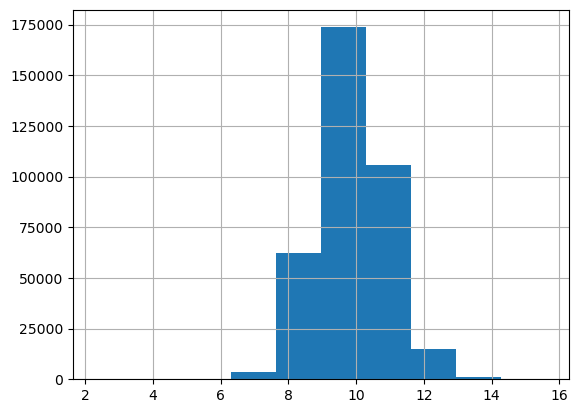

In [18]:
# 회귀 분석을 위해 target 데이터 log 씌위서 분포 변경

import numpy as np
np.log1p(num_h_df['Total Charges']).hist()

num_h_df['Total Charges'] = np.log1p(num_h_df['Total Charges'])

# Cycle01
- 타겟 데이터 분포가 일정하여 차원 축소 없이 분석 진행

array([[<Axes: title={'center': 'Health Service Area'}>,
        <Axes: title={'center': 'Hospital County'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Race'}>],
       [<Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'Length of Stay'}>,
        <Axes: title={'center': 'Type of Admission'}>,
        <Axes: title={'center': 'Patient Disposition'}>,
        <Axes: title={'center': 'APR Risk of Mortality'}>],
       [<Axes: title={'center': 'APR Medical Surgical Description'}>,
        <Axes: title={'center': 'Emergency Department Indicator'}>,
        <Axes: title={'center': 'Operating Certificate Number'}>,
        <Axes: title={'center': 'Facility ID'}>,
        <Axes: title={'center': 'CCS Diagnosis Code'}>],
       [<Axes: title={'center': 'CCS Procedure Code'}>,
        <Axes: title={'center': 'APR DRG Code'}>,
        <Axes: title={'center': 'APR MDC Code'}>,
        <Axes: titl

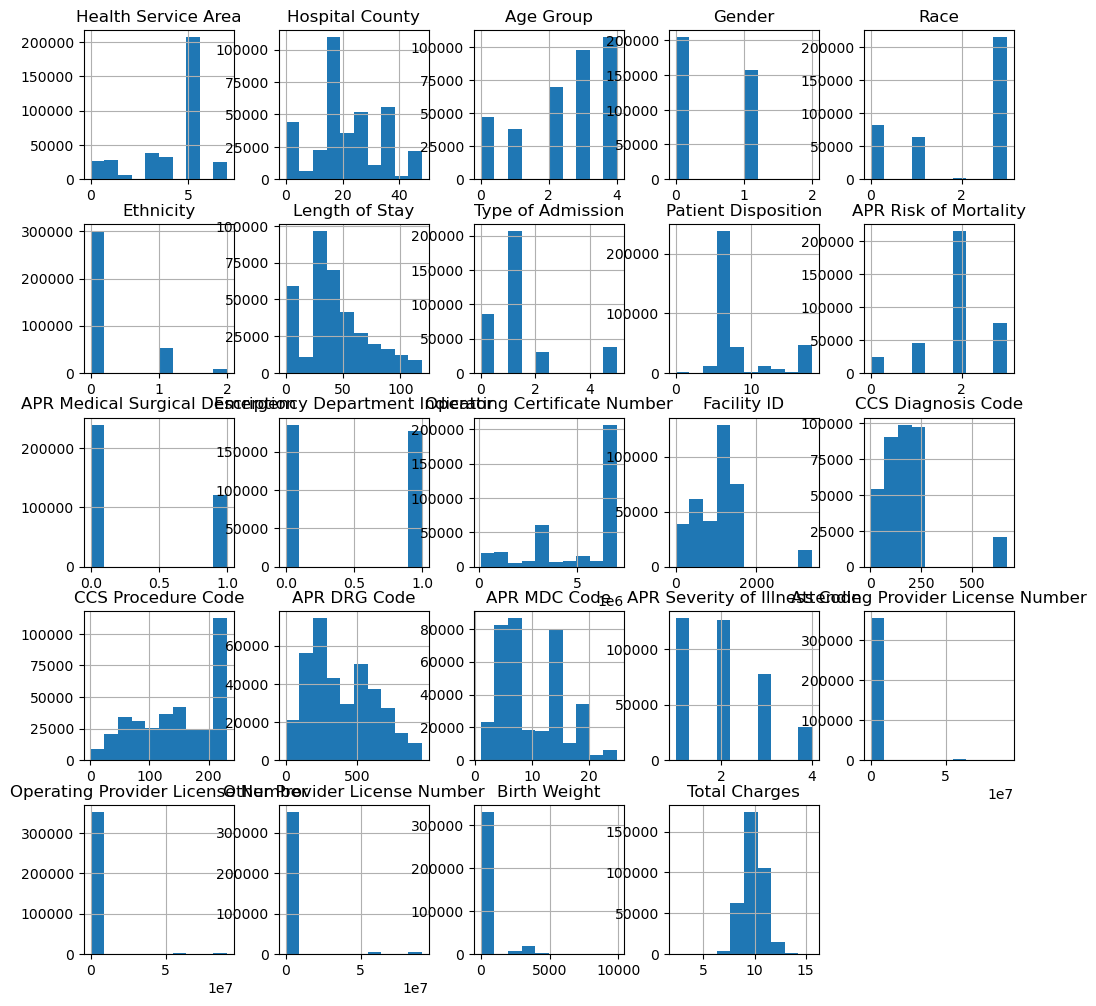

In [19]:
num_h_df.hist(figsize=(12,12))

In [20]:
# 회귀 분석 모델 사용
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = num_h_df.iloc[:, :-1], num_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_negative(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE,  R2))


In [23]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.4996, RMSE: 0.7068, MSLE: 0.0041, RMSLE: 0.0644, R2: 0.5210


In [24]:
# 비선형 모델 사용
# 회귀 분석 모델 사용
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [25]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 0.3935, RMSE: 0.6273, R2: 0.6228


In [26]:
from statsmodels.api import OLS

features, targets = num_h_df.iloc[:, :-1],  num_h_df.iloc[:, -1] 
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:          Total Charges   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          9.337e+05
Date:                Wed, 15 May 2024   Prob (F-statistic):                        0.00
Time:                        04:53:54   Log-Likelihood:                     -6.0101e+05
No. Observations:              361441   AIC:                                  1.202e+06
Df Residuals:                  361418   BIC:                                  1.202e+06
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = num_h_df.iloc[:, :-1],  num_h_df.iloc[:, -1] 

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.1748, RMSE: 0.4181, MSLE: 0.0015, RMSLE: 0.0383, R2: 0.8324
RandomForestRegressor
MSE: 0.0920, RMSE: 0.3033, MSLE: 0.0008, RMSLE: 0.0278, R2: 0.9118
GradientBoostingRegressor
MSE: 0.2004, RMSE: 0.4476, MSLE: 0.0016, RMSLE: 0.0406, R2: 0.8079
XGBRegressor
MSE: 0.0839, RMSE: 0.2896, MSLE: 0.0007, RMSLE: 0.0268, R2: 0.9196
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1909
[LightGBM] [Info] Number of data points in the train set: 289152, number of used features: 23
[LightGBM] [Info] Start training from score 9.866900
LGBMRegressor
MSE: 0.1040, RMSE: 0.3225, MSLE: 0.0009, RMSLE: 0.0296, R2: 0.9003


# C01
- 차원 축소 없이 분석을 진행했을 때 비선형 모델에서 수치가 높아지는 부분 확인
- 트리 모델에서 더욱 높은 수치 확인

# Cycle02
- 모델의 다중공선성을 지닌 수치 중 높은 수치에 대하여 삭제 후 확인
- 모델 훈련속도의 효율을 높이기 위해 차원축소를 진행.

In [28]:
# 상관관계 확인
num_h_df.corr()['Total Charges'].sort_values(ascending=False)[1:]

APR Severity of Illness Code         0.486630
Age Group                            0.422561
APR Medical Surgical Description     0.361859
Length of Stay                       0.298206
Patient Disposition                  0.240173
Race                                 0.076153
Health Service Area                  0.053485
Gender                               0.043458
Emergency Department Indicator      -0.003094
Operating Certificate Number        -0.029341
Attending Provider License Number   -0.043427
Facility ID                         -0.051807
Operating Provider License Number   -0.053363
Hospital County                     -0.073073
Other Provider License Number       -0.076901
Ethnicity                           -0.103746
Type of Admission                   -0.140865
CCS Diagnosis Code                  -0.156662
APR MDC Code                        -0.197764
APR DRG Code                        -0.228066
APR Risk of Mortality               -0.230462
CCS Procedure Code                

<Axes: xlabel='APR Severity of Illness Code', ylabel='Total Charges'>

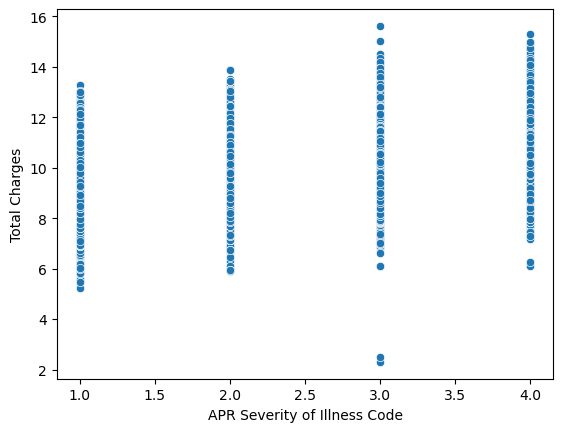

In [29]:
import seaborn as sns
sns.scatterplot(x='APR Severity of Illness Code', y='Total Charges', data = num_h_df)

<Axes: >

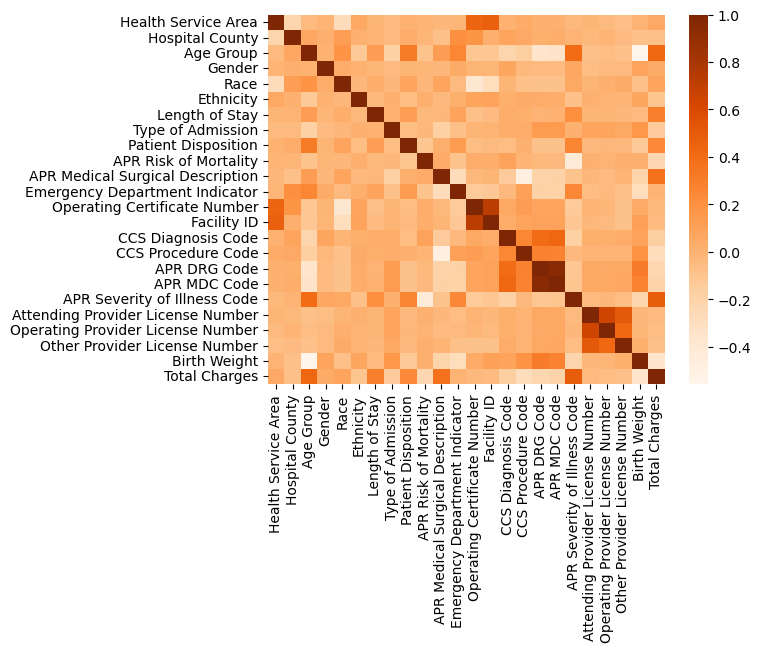

In [30]:
import seaborn as sns
corr = num_h_df.corr()
sns.heatmap(corr, cmap='Oranges')

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [32]:
get_vif(features)

,vif_score,feature
0,8.740017,Health Service Area
1,5.760529,Hospital County
2,8.283720,Age Group
3,1.845001,Gender
4,3.904548,Race
5,1.214833,Ethnicity
6,3.548426,Length of Stay
7,1.930663,Type of Admission
8,7.004704,Patient Disposition
9,6.812613,APR Risk of Mortality


In [33]:
c2_h_df = num_h_df.drop(labels = ['Operating Certificate Number', 'APR DRG Code', 'Health Service Area'], axis = 1)

In [34]:
features, targets = c2_h_df.iloc[:, :-1], c2_h_df.iloc[:, -1]
get_vif(features)

,vif_score,feature
0,4.711609,Hospital County
1,8.249438,Age Group
2,1.837959,Gender
3,3.674779,Race
4,1.210757,Ethnicity
5,3.544171,Length of Stay
6,1.927200,Type of Admission
7,6.952827,Patient Disposition
8,6.502704,APR Risk of Mortality
9,2.009720,APR Medical Surgical Description


In [35]:
c2_h_df.corr()['Total Charges'].sort_values(ascending=False)[1:]

APR Severity of Illness Code         0.486630
Age Group                            0.422561
APR Medical Surgical Description     0.361859
Length of Stay                       0.298206
Patient Disposition                  0.240173
Race                                 0.076153
Gender                               0.043458
Emergency Department Indicator      -0.003094
Attending Provider License Number   -0.043427
Facility ID                         -0.051807
Operating Provider License Number   -0.053363
Hospital County                     -0.073073
Other Provider License Number       -0.076901
Ethnicity                           -0.103746
Type of Admission                   -0.140865
CCS Diagnosis Code                  -0.156662
APR MDC Code                        -0.197764
APR Risk of Mortality               -0.230462
CCS Procedure Code                  -0.278166
Birth Weight                        -0.348888
Name: Total Charges, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

features, targets = c2_h_df.iloc[:, :-1], c2_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


In [37]:
from sklearn.decomposition import PCA

for i in range(4):
    pca = PCA(n_components=(i + 1))
    
    pca_train = pca.fit_transform(X_train)

    # 손실율
    print(pca.explained_variance_ratio_.sum())

0.6792198233024007
0.9090310020482929
0.9999999961640216
0.9999999988123194


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

features, targets = c2_h_df.iloc[:, :-1], c2_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()

# pipe = Pipeline([('pca', PCA(n_components=2)), ('l_r', l_r)])
# 성능이 가장 좋았던 모델로 사용
pipe = Pipeline([('pca', PCA(n_components=8)), ('lgb_r', LGBMRegressor(random_state=321))])
pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 289152, number of used features: 8
[LightGBM] [Info] Start training from score 9.866142


Pipeline(steps=[('pca', PCA(n_components=8)),
                ('lgb_r', LGBMRegressor(random_state=321))])

In [39]:
prediction = pipe.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 0.3063, RMSE: 0.5534, R2: 0.7071


MSE: 0.2992, RMSE: 0.5470, R2: 0.7131
MSE: 0.2980, RMSE: 0.5459, R2: 0.7127


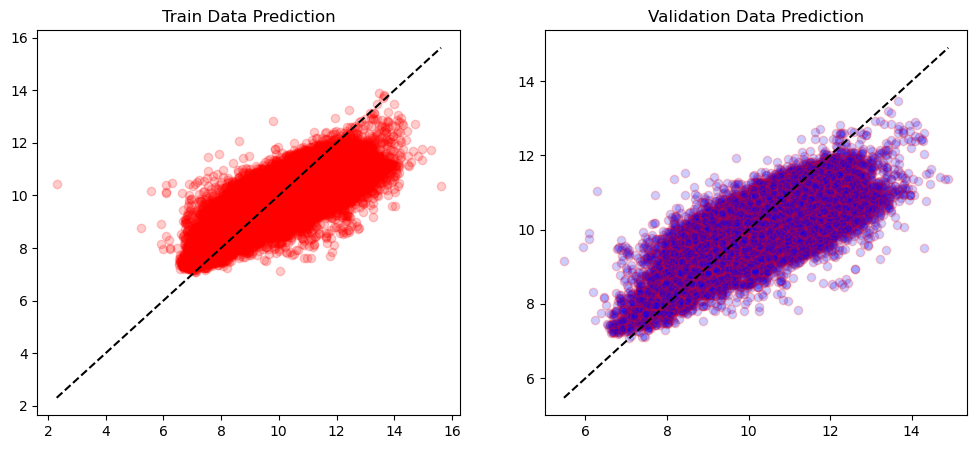

In [40]:
import matplotlib.pyplot as plt


r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)

r_X_train_prediction = pipe.predict(r_X_train)
get_evaluation_negative(r_y_train, r_X_train_prediction)

v_X_train_prediction = pipe.predict(v_X_train)
get_evaluation_negative(v_y_train, v_X_train_prediction)


fig, ax = plt.subplots(1, 2, figsize= (12, 5))

ax[0].scatter(r_y_train, r_X_train_prediction, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, v_X_train_prediction, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()



MSE: 0.3063, RMSE: 0.5534, R2: 0.7071


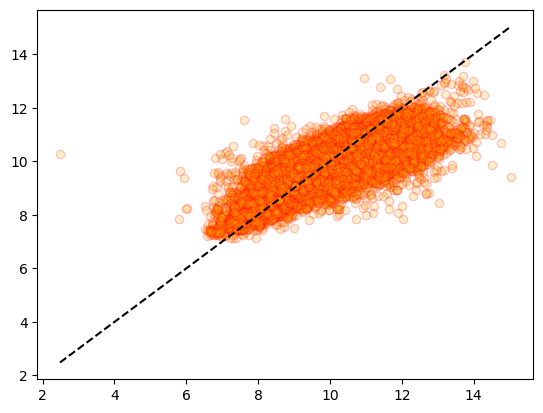

In [41]:
import matplotlib.pyplot as plt

prediction = pipe.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# Cycle03 
- 모델의 신뢰성을 높이기 위해 교차검증 진행

In [42]:
from sklearn.model_selection import cross_val_score, KFold

features, targets = c2_h_df.iloc[:,:-1], c2_h_df.iloc[:,-1]

kf = KFold(n_splits=10, random_state=321, shuffle=True)
scores = cross_val_score( lgb_r, features, targets , cv=kf)
scores

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 325296, number of used features: 20
[LightGBM] [Info] Start training from score 9.867059
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 325297, number of used features: 20
[LightGBM] [Info] Start training from score 9.867183
[LightGBM] [Warning] Found

array([0.89412771, 0.89391949, 0.89559464, 0.89305629, 0.89536895,
       0.89599536, 0.89029503, 0.89492653, 0.89381586, 0.89115958])

In [43]:
# 파이프라인 구축 후 차원 축소 후 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler


features, targets = c2_h_df.iloc[:,:-1], c2_h_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

kfold = KFold(n_splits=10, random_state=321, shuffle=True)


parameters = {
    # 'lgb_r__num_leaves': [10, 20, 30],
    # 'lgb_r__learning_rate': [0.05, 0.1, 0.15],
    # 'lgb_r__n_estimators': [50],
    # 'lgb_r__reg_lambda': [10000]  # L2 규제 추가
    'lgb_r__random_state': [321]
}

pipe = Pipeline(
    [
        ('pca', PCA(n_components=8)),
        ('lgb_r', LGBMRegressor())
    ]
)

grid_lgb = GridSearchCV(pipe, param_grid=parameters, cv=kfold, scoring='r2')
grid_lgb.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_lgb.best_score_))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 260236, number of used features: 8
[LightGBM] [Info] Start training from score 9.866586
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 260236, number of used features: 8
[LightGBM] [Info] Start training from score 9.867479
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [44]:
prediction = grid_lgb.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 0.3039, RMSE: 0.5513, R2: 0.7087


MSE: 0.2969, RMSE: 0.5448, R2: 0.7154
MSE: 0.3003, RMSE: 0.5480, R2: 0.7107


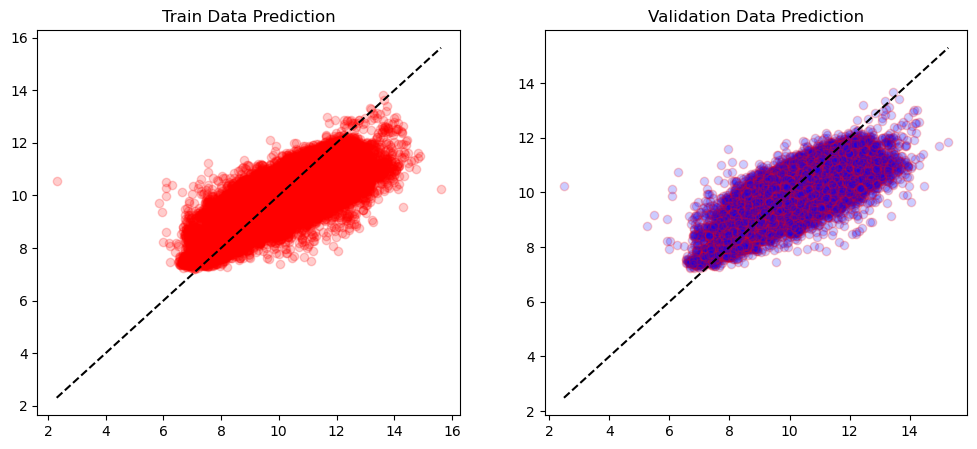

In [45]:
import matplotlib.pyplot as plt


r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)

r_X_train_prediction = grid_lgb.predict(r_X_train)
get_evaluation_negative(r_y_train, r_X_train_prediction)

v_X_train_prediction = grid_lgb.predict(v_X_train)
get_evaluation_negative(v_y_train, v_X_train_prediction)


fig, ax = plt.subplots(1, 2, figsize= (12, 5))

ax[0].scatter(r_y_train, r_X_train_prediction, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, v_X_train_prediction, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()



MSE: 0.3039, RMSE: 0.5513, R2: 0.7087


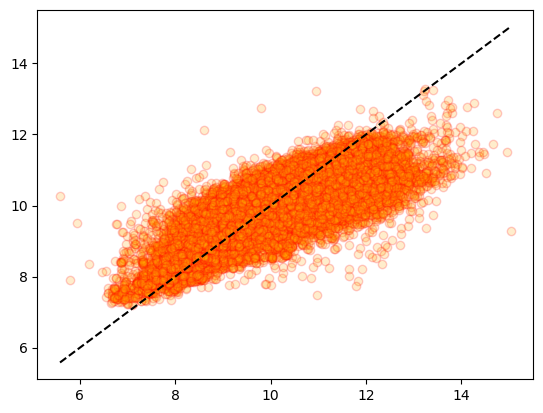

In [46]:
import matplotlib.pyplot as plt

prediction = grid_lgb.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

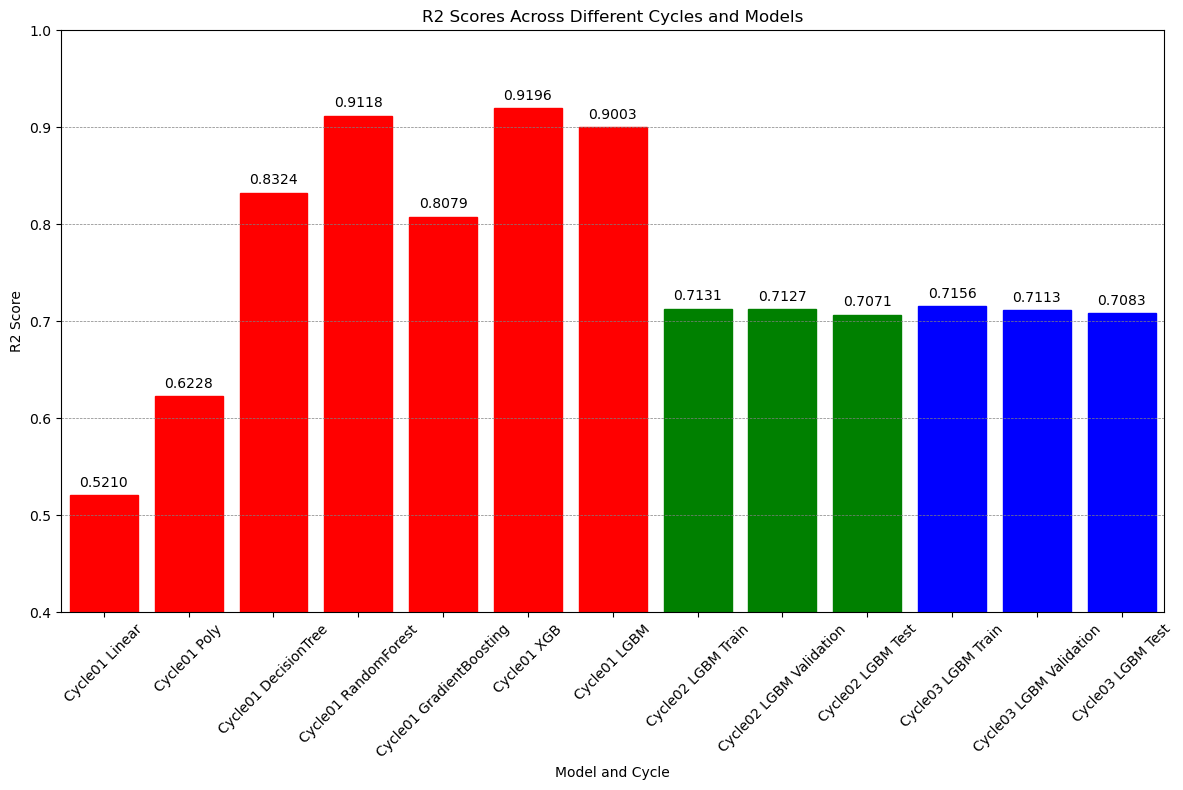

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
data = {
    "Model_Cycle": [
        "Cycle01 Linear", "Cycle01 Poly", "Cycle01 DecisionTree", 
        "Cycle01 RandomForest", "Cycle01 GradientBoosting", "Cycle01 XGB", "Cycle01 LGBM",
        "Cycle02 LGBM Train", "Cycle02 LGBM Validation", "Cycle02 LGBM Test",
        "Cycle03 LGBM Train", "Cycle03 LGBM Validation", "Cycle03 LGBM Test"
    ],
    "R2": [
        0.5210, 0.6228, 0.8324,
        0.9118, 0.8079, 0.9196, 0.9003,
        0.7131, 0.7127, 0.7071,
        0.7156, 0.7113, 0.7083
    ]
}

df = pd.DataFrame(data)

# 막대 그래프 설정
plt.figure(figsize=(12, 8))  # 그래프 크기 조절
bar_plot = sns.barplot(x="Model_Cycle", y="R2", data=df, palette="viridis")

# 사이클별 색상 지정
colors = ['red', 'green', 'blue']
cycle_colors = {cycle: colors[i % len(colors)] for i, cycle in enumerate(df['Model_Cycle'].apply(lambda x: x.split()[0]).unique())}

for bar, color in zip(bar_plot.patches, df['Model_Cycle'].apply(lambda x: cycle_colors[x.split()[0]])):
    bar.set_color(color)  # 각 막대에 색상 적용

# 각 막대에 R2 점수 텍스트 추가
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.4f'), 
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# 레이블 및 타이틀 설정
plt.xlabel("Model and Cycle")
plt.ylabel("R2 Score")
plt.title("R2 Scores Across Different Cycles and Models")
plt.xticks(rotation=45)  # x축 레이블 회전
plt.ylim(0.4, 1.0)  # y축 범위 조정
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', axis='y', zorder=0)

# 그래프 보여주기
plt.tight_layout()
plt.show()


# 가설?

- 퇴원시 측정되는 금액에 대하여 어려 요소들이 상관관계가 있을 것이며 그에 따른 금액에 대한 회귀 분석을 진행할 수 있을 것이다.

특정 진단 코드 또는 절차 코드에 대해 더 많은 의료 보장이 필요한 지역을 진단하는 데 사용할 수 있습니다.
다양한 지불 소스 간의 상관 관계를 살펴봄으로써 비용 효율성 향상 - 병원은 이 데이터 세트를 통해 자원 할당을 최적화하여 입원 환자 방문 중 비용 효율성을 향상시키는 데 사용할 수 있는 다양한 지불 소스(예: Medicaid 및 민간 보험) 간의 패턴이나 상관 관계를 식별할 수 있습니다.

퇴원 금액과 요소들의 상관관계: 병원 퇴원 시 측정되는 금액은 다양한 요소들과 상관관계가 있으며, 이러한 상관관계를 기반으로 금액에 대한 회귀 분석을 수행할 수 있습니다.
응용 가능성:

진단 코드와 의료 보장: 특정 진단 코드 또는 절차 코드가 포함된 데이터를 사용하여 더 많은 의료 보장이 필요한 지역을 식별할 수 있습니다. 이는 지역별 의료 서비스의 효율성을 높이는 데 기여할 수 있습니다.
비용 효율성과 지불 소스 분석: 다양한 지불 소스 간의 상관관계를 분석함으로써 병원은 자원 할당을 최적화하고 입원 환자 방문 중 비용 효율성을 향상시킬 수 있습니다. 이러한 분석은 Medicaid, 민간 보험 등 다양한 지불 소스 간의 패턴을 식별하는 데 유용합니다.

# 결론
- 여러 요소들에 의해 병원의 퇴원 금액이 높아질 수 있으며 어느정도 예측이 가능한 모델을 만들 수 있으며, 차원 축소를 진행했음에도 불구하고 매우 높은 수치를 보이고 있습니다.
- 별도의 과적합 정도는 보이지 않아 규제를 두지 않았으며 트리 기반의 회귀 모델을 사용하였습니다.

분석 결과:

예측 가능한 모델의 개발: 분석을 통해 개발된 모델은 여러 요소들을 고려하여 병원의 퇴원 금액을 어느 정도 예측할 수 있음을 보여줍니다. 모델은 차원 축소 후에도 높은 성능을 유지하고 있습니다.
과적합의 부재: 과적합이 관찰되지 않아 모델에 추가적인 규제를 적용하지 않았습니다. 이는 모델이 훈련 데이터에 대해 지나치게 최적화되지 않고 일반화된 결과를 제공하고 있음을 의미합니다.
사용된 기술:

트리 기반 회귀 모델: 트리 기반의 회귀 모델을 사용하여 분석을 수행하였으며, 이 모델은 복잡한 데이터 구조에서 유의미한 인사이트를 추출하는 데 효과적이었습니다.